In [28]:
# make necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import sys, os
from contextlib import contextmanager
import matplotlib as mpl
import seaborn as sns
import sklearn

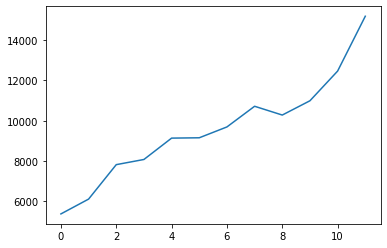

In [29]:
# Visualise and interpret the pattern of this time-series
df=pd.read_csv('data.csv')
df.head()
plt.plot(df['Sales'])
plt.show()

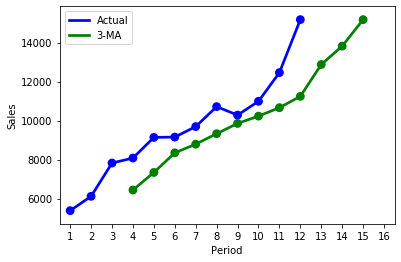

In [30]:
# Predict future demand in month 13, 14, 15, 16
# [A] using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Period', 'Sales'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Sales'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
    
    moving_average_df['Period'] = moving_average_df['Period'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1,1)
ma_df = moving_average(df, 3, 16)
sns.pointplot(x='Period', y='Sales', data=df, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.show()

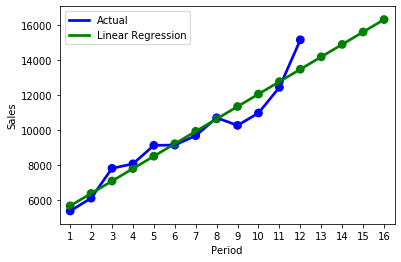

In [33]:
# [B] Using Linear Regression
def linear_regression(df):
    linear_df = df.copy()
    linear_df['PeriodSales'] = linear_df['Period']*linear_df['Sales']
    linear_df['Period_2'] = linear_df['Period']*linear_df['Period']
    linear_df['Sales_2'] = linear_df['Sales']*linear_df['Sales']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['PeriodSales']- len(df)*linear_mean['Period']*linear_mean['Sales'])\
        / (linear_sum['Period_2']-len(df)*linear_mean['Period']*linear_mean['Period'])
    a = linear_mean['Sales']-b*linear_mean['Period']                                                                        
    return a,b

a,b = linear_regression(df)
linear_df = pd.DataFrame(columns=['Period', 'Sales'])
for m in range(1,17):
    sale = a + b * m
    linear_df.loc[m-1] = [m, sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1,1)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=linear_df, color='g')

ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", "Linear Regression"])
plt.show()

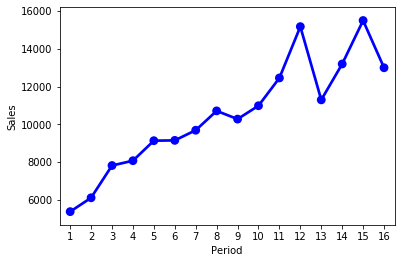

In [35]:
# Evaluation: compare the above implemented methods, 
# Give the ground truth + visualise
eval_df = pd.read_csv('actual.csv')
eval_df = pd.concat([df, eval_df], ignore_index = True)
sns.pointplot(x='Period', y='Sales', data=eval_df, color='b')

In [37]:
# Exercises using climate data csv, predict the 'LandAverageTemperature' of 2015

# make necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import sys, os
from contextlib import contextmanager
import matplotlib as mpl
import seaborn as sns
import sklearn


In [51]:
# Visualise and interpret the pattern of this time-series for climate csv
df=pd.read_csv('climate_data.csv')
df.head()


,dt,LandAverageTemperature
0,1/1/2010,3.737
1,2/1/2010,4.399
2,3/1/2010,6.738
3,4/1/2010,9.671
4,5/1/2010,12.406


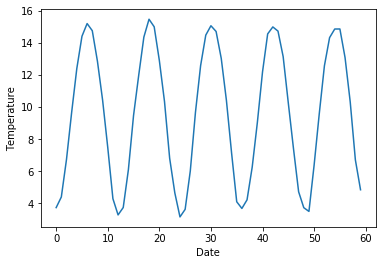

In [66]:
plt.plot(df['LandAverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

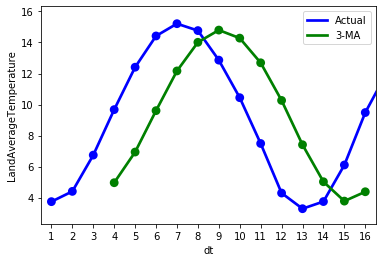

In [44]:
# Predict LandAverageTemperature for 2015
# [A] using moving average with suitable k
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['dt', 'LandAverageTemperature'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            temp_predict = float('nan')
        else:
            history = df['LandAverageTemperature'][m-k:m]
            temp_predict = history.mean()
        moving_average_df.loc[m] = [m+1, temp_predict]
    
    moving_average_df['dt'] = moving_average_df['dt'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1,1)
ma_df = moving_average(df, 3, 16)
sns.pointplot(x='dt', y='LandAverageTemperature', data=df, color='b')
sns.pointplot(x='dt', y='LandAverageTemperature', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.show()

In [55]:
# [B] Using Linear Regression predict LandAverateTemp for 2015
# Need some guidance with this question

def linear_regression(df):
    linear_df = df.copy()
    linear_df['dt_LAT'] = linear_df['dt']*linear_df['LandAverageTemperature']
    linear_df['dt_2'] = linear_df['dt']*linear_df['dt']
    linear_df['temp_2'] = linear_df['LandAverageTemperature']*linear_df['LandAverageTemperature']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['dt_LAT']- len(df)*linear_mean['dt']*linear_mean['LandAverageTemperature'])\
        / (linear_sum['dt_2']-len(df)*linear_mean['dt']*linear_mean['dt'])
    a = linear_mean['LandAverageTemperature']-b*linear_mean['dt']                                                                        
    return a,b

a,b = linear_regression(df)
linear_df = pd.DataFrame(columns=['dt', 'LandAverageTemperature'])
for m in range(1,17):
    temp = a + b * m
    linear_df.loc[m-1] = [m, temp]
linear_df['dt'] = linear_df['dt'].astype(int) # Think this needs to be float???

f, ax = plt.subplots(1,1)
sns.pointplot(ax=ax, x='dt', y='LandAverageTemperature', data=df, color='b')
sns.pointplot(ax=ax, x='dt', y='LandAverageTemperature', data=linear_df, color='g')

ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", "Linear Regression"])
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

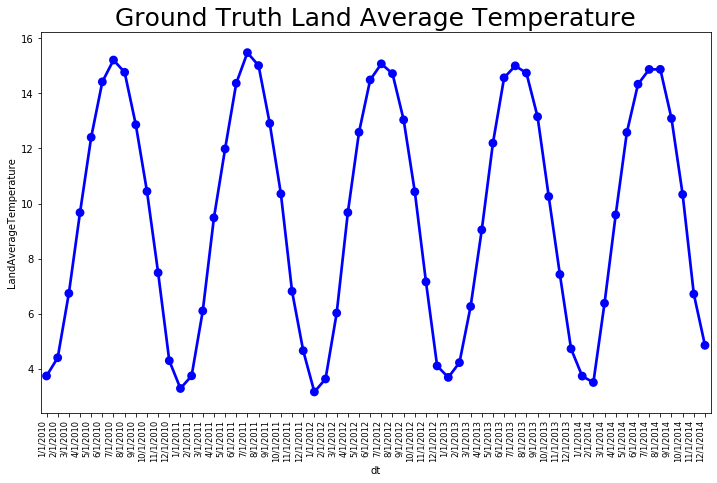

In [63]:
# Visualise the Ground Truth
# Evaluation: compare the above accuracy of both methods, 

eval_df = pd.read_csv('actual.csv')
eval_df = pd.concat([df, eval_df], ignore_index = True)

plt.figure(figsize=(12,7))

chart = sns.pointplot(x='dt', y='LandAverageTemperature', data=eval_df, color='b')

chart.set_xticklabels(
        chart.get_xticklabels(),
        rotation=90,
        horizontalalignment='right',
        fontweight='light',
        fontsize='small'
)
plt.title('Ground Truth Land Average Temperature', size=25)
plt.show()